In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eig
from numpy.linalg import svd
from scipy.stats import bernoulli
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_spd_matrix

Question - 1

In [2]:
def get_mu_MLE(x, n):
    # used in PART (B) and (C)
    mu_MLE = np.sum(x[:n], axis=0) / n
    return mu_MLE
    

In [3]:
def compute_discriminant(x, p_ij, p_w):
    x1, x2 = x[0], x[1]
    p_1j = p_ij[0]
    p_2j = p_ij[1]
    g_x = x1*np.log(p_1j) + (1 - x1)*np.log(1 - p_1j) + x2*np.log(p_2j) + (1 - x2)*np.log(1 - p_2j) + np.log(p_w)
    return g_x

In [4]:
# Part (A)
mean_c1 = [0.5, 0.8]
mean_c2 = [0.9, 0.2]
n1 = 100
n2 = 100
d = 2
samples_c1 = bernoulli.rvs(mean_c1, size=(n1, d)) #generate 100 samples for class 1
samples_c2 = bernoulli.rvs(mean_c2, size=(n2, d)) #generate 100 samples for class 2
labels_c1 = np.array([1]*100)
labels_c2 = np.array([2]*100)

In [5]:
# Part (B)

#splitting into train & test set.
train_samples_1 = samples_c1[:50]
test_samples_1 = samples_c1[50:]

In [6]:
mu1_MLE = get_mu_MLE(train_samples_1, len(train_samples_1))
print(f"Using the 50 samples, MLE estimate mu1: \n {mu1_MLE}")
n1_train = 50
mu1_MLE_c1 = []
for i in range(1, n1_train + 1):
    mu1_MLE_c1_n = get_mu_MLE(train_samples_1, i)
    mu1_MLE_c1.append(mu1_MLE_c1_n)
# mu1_MLE_c1

Using the 50 samples, MLE estimate mu1: 
 [0.52 0.78]


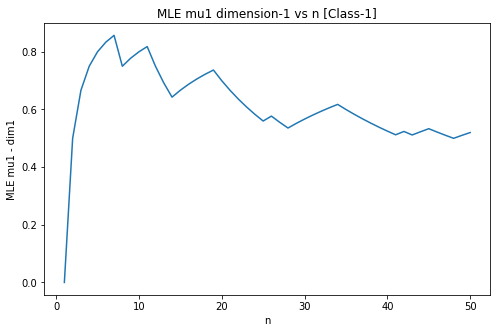

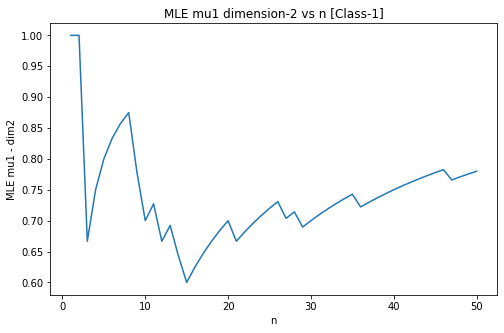

In [7]:
n1_train_vals = [i for i in range(1, 51)]
mu1_MLE_dim1 = [mu1_MLE_c1[i][0] for i in range(len(mu1_MLE_c1))]
mu1_MLE_dim2 = [mu1_MLE_c1[i][1] for i in range(len(mu1_MLE_c1))]

plt.figure(figsize=(8, 5))
plt.plot(n1_train_vals, mu1_MLE_dim1)
plt.xlabel("n")
plt.ylabel("MLE mu1 - dim1")
plt.title("MLE mu1 dimension-1 vs n [Class-1]")
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(n1_train_vals, mu1_MLE_dim2)
plt.xlabel("n")
plt.ylabel("MLE mu1 - dim2")
plt.title("MLE mu1 dimension-2 vs n [Class-1]")
plt.show()


It is clear from the graphs that as the number of samples increase, the MLE estimate for 'mu' approach the actual 'mu' value.

In [8]:
# Part (C) [Repitition of step (B) but for class 2 now]
train_samples_2 = samples_c2[:50]
test_samples_2 = samples_c2[50:]

In [9]:
mu2_MLE = get_mu_MLE(train_samples_2, len(train_samples_2))
print(f"Using the 50 samples, MLE estimate mu2: \n {mu2_MLE}")
n2_train = 50
mu2_MLE_c2 = []
for i in range(1, n2_train + 1):
    mu2_MLE_c2_n = get_mu_MLE(train_samples_2, i)
    mu2_MLE_c2.append(mu2_MLE_c2_n)

Using the 50 samples, MLE estimate mu2: 
 [0.94 0.24]


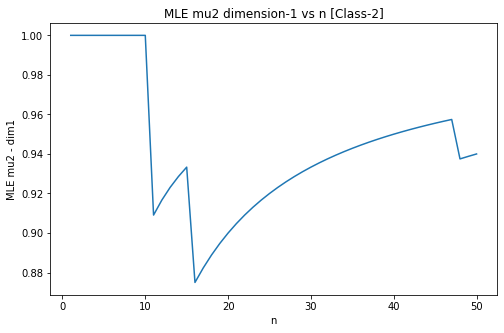

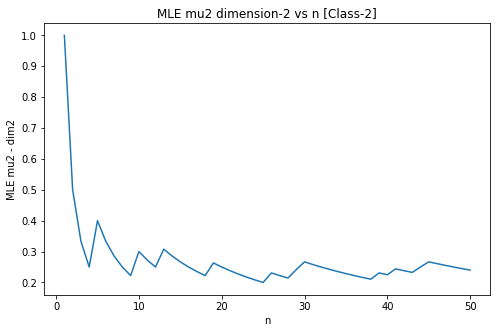

In [10]:
n2_train_vals = [i for i in range(1, 51)]
mu2_MLE_dim1 = [mu2_MLE_c2[i][0] for i in range(len(mu2_MLE_c2))]
mu2_MLE_dim2 = [mu2_MLE_c2[i][1] for i in range(len(mu2_MLE_c2))]

plt.figure(figsize=(8, 5))
plt.plot(n2_train_vals, mu2_MLE_dim1)
plt.xlabel("n")
plt.ylabel("MLE mu2 - dim1")
plt.title("MLE mu2 dimension-1 vs n [Class-2]")
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(n2_train_vals, mu2_MLE_dim2)
plt.xlabel("n")
plt.ylabel("MLE mu2 - dim2")
plt.title("MLE mu2 dimension-2 vs n [Class-2]")
plt.show()

It is clear from the graphs that as the number of samples increase, the MLE estimate for 'mu' approach the actual 'mu' value.

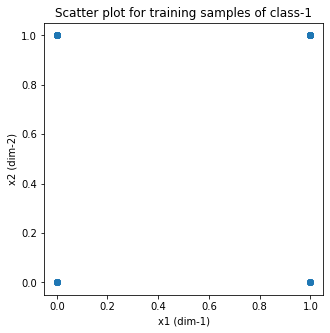

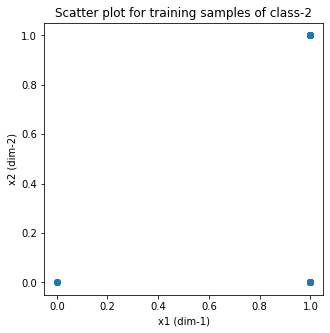

In [11]:
# Part (D)
x1_class1 = [train_samples_1[i][0] for i in range(len(train_samples_1))]
x2_class1 = [train_samples_1[i][1] for i in range(len(train_samples_1))]
x1_class2 = [train_samples_2[i][0] for i in range(len(train_samples_2))]
x2_class2 = [train_samples_2[i][1] for i in range(len(train_samples_2))]

#plotting training samples for class-1 using scatterplot
plt.figure(figsize=(5, 5))
plt.scatter([x1_class1], x2_class1)
plt.xlabel("x1 (dim-1)")
plt.ylabel("x2 (dim-2)")
plt.title("Scatter plot for training samples of class-1")
plt.show()

plt.figure(figsize=(5, 5))
plt.scatter(x1_class2, x2_class2)
plt.xlabel("x1 (dim-1)")
plt.ylabel("x2 (dim-2)")
plt.title("Scatter plot for training samples of class-2")
plt.show()

In [12]:
p_i1 = [mu1_MLE_c1[49][0], mu1_MLE_c1[49][1]]
p_i2 = [mu2_MLE_c2[49][0], mu2_MLE_c2[49][1]]
p_w1 = 0.5
p_w2 = 0.5

classifications_1 = []
classifications_2 = []

correct_c1 = 0
correct_c2 = 0

for x_test_1 in test_samples_1:
    g1_x = compute_discriminant(x_test_1, p_i1, p_w1)
    g2_x = compute_discriminant(x_test_1, p_i2, p_w2)
    if(g1_x >= g2_x):
        classifications_1.append(1)
        correct_c1 += 1
    else:
        classifications_1.append(2)

for x_test_2 in test_samples_2:
    g1_x = compute_discriminant(x_test_2, p_i1, p_w1)
    g2_x = compute_discriminant(x_test_2, p_i2, p_w2)
    if(g1_x >= g2_x):
        classifications_2.append(1)
    else:
        classifications_2.append(2)
        correct_c2 += 1

print(f"Total test samples belonging to class-1 : {len(test_samples_1)}")
print(f"Total test samples belonging to class-2 : {len(test_samples_2)}")
print("------------------------------")
print(f"Classification for test samples belonging class-1 \n {classifications_1}")
print("------------------------------")
print(f"Classification for test samples belonging class-2 \n {classifications_2}")
print("------------------------------")
print(f"No. of samples correctly classified in class-1 : {correct_c1}")
print(f"No. of samples correctly classified in class-2 : {correct_c2}")

print(f"Accuracy (class-1): {correct_c1 / len(test_samples_1)}")
print(f"Accuracy (class-2): {correct_c2 / len(test_samples_2)}")

Total test samples belonging to class-1 : 50
Total test samples belonging to class-2 : 50
------------------------------
Classification for test samples belonging class-1 
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
------------------------------
Classification for test samples belonging class-2 
 [2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2]
------------------------------
No. of samples correctly classified in class-1 : 47
No. of samples correctly classified in class-2 : 39
Accuracy (class-1): 0.94
Accuracy (class-2): 0.78


# ------------------------------------------------------------- #

Question - 3

In [13]:
def compute_mean(X):
    return X.mean(axis=1)

In [14]:
def compute_centralized(X, mean):
    X_c = X - np.array([mean]).T
    return X_c

In [15]:
def compute_covariance_mat(X_c, n):
   
    S = np.dot(X_c, (X_c).T) / n
    return S

In [16]:
def get_eigs(cov_X):
    un, eig_vals, eig_vects = svd(cov_X)
    return eig_vals, eig_vects

In [17]:
def get_encoding_Y(U, X_c):
    U_trans = U.T
    Y = np.dot(U_trans, X_c)
    return Y

In [18]:
def compute_MSE(a, b):
    n, m = a.shape
    total = n * m
    mse = np.sum(np.square(np.subtract(a, b))) / total
    return mse

In [19]:
def sort_eigenvects(eigenvects, eigenvals):
    val_to_vect = []
    for i in range(len(eigenvals)):
        evec = eigenvects[:, i]
        val_to_vect.append((eigenvals[i], evec))
    # print(val_to_vect)
    sorted_vals = sorted(val_to_vect, key=lambda x : x[0], reverse=True)
    sorted_U = np.column_stack([x[1] for x in sorted_vals])
    return sorted_U

In [20]:
def display_info(x, mean, x_c, cov_x, eig_vals, u, y, uy_plus_mean, mse):
    print(f"X : \n{x}\n---------------\nMean : \n{mean}\n---------------\nX_c : \n{x_c} \n---------------\nCov_X : \n{cov_x}\n---------------\nEigenvalues : \n{eig_vals}\n---------------\nU : \n{u}\n---------------\nY: \n{y}\n---------------\nUY + mean : \n{uy_plus_mean}\n---------------\nMSE : {mse}")

In [21]:
def get_MVG_distribution(d, N):
    mean = np.random.rand(d)
    cov = make_spd_matrix(d)
    data_MVG = np.random.default_rng().multivariate_normal(mean, cov, N).T
    return data_MVG

In [22]:
#For 2x2
X = np.array([[5, 7], [6, 8]])
mean_X = compute_mean(X)
X_c = compute_centralized(X, mean_X)
cov_X = compute_covariance_mat(X_c, 2)
eigen_vals, U_unordered = get_eigs(cov_X)
U = sort_eigenvects(U_unordered, eigen_vals)
eigen_vals_sorted = sorted(eigen_vals, reverse=True)
Y = get_encoding_Y(U, X_c)
UY_plus_mean = np.dot(U, Y) + np.array([mean_X]).T
MSE_value = compute_MSE(X, UY_plus_mean)
display_info(X, mean_X, X_c, cov_X, eigen_vals_sorted, U, Y, UY_plus_mean, MSE_value)

X : 
[[5 7]
 [6 8]]
---------------
Mean : 
[6. 7.]
---------------
X_c : 
[[-1.  1.]
 [-1.  1.]] 
---------------
Cov_X : 
[[1. 1.]
 [1. 1.]]
---------------
Eigenvalues : 
[2.0, 0.0]
---------------
U : 
[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]
---------------
Y: 
[[ 1.41421356e+00 -1.41421356e+00]
 [-1.11022302e-16  1.11022302e-16]]
---------------
UY + mean : 
[[5. 7.]
 [6. 8.]]
---------------
MSE : 0.0


In [23]:
#For MVG with arbitrary d and N

d = 10 #set any arbitrary value of d
N = 100 #set any arbitrary value of N
X_mvg = get_MVG_distribution(d, N) #data matrix
#computing U for this data
mean_X_mvg = compute_mean(X_mvg)
X_c_mvg = compute_centralized(X_mvg, mean_X_mvg)
cov_X_mvg = compute_covariance_mat(X_c_mvg, N)

eigen_vals_mvg, U_unordered_mvg = get_eigs(cov_X_mvg)
U_mvg = sort_eigenvects(U_unordered_mvg, eigen_vals_mvg)  #This is the U matrix for this data

eigen_vals_sorted_mvg = sorted(eigen_vals_mvg, reverse=True)
Y_mvg = get_encoding_Y(U_mvg, X_c_mvg)
UY_plus_mean_mvg = np.dot(U_mvg, Y_mvg) + np.array([mean_X_mvg]).T
MSE_value_mvg = compute_MSE(X_mvg, UY_plus_mean_mvg)
display_info(X_mvg, mean_X_mvg, X_c_mvg, cov_X_mvg, eigen_vals_sorted_mvg, U_mvg, Y_mvg, UY_plus_mean_mvg, MSE_value_mvg)

X : 
[[ 2.48934772e-01  1.11656031e+00  1.81920628e-01 -5.08689762e-01
   2.18313460e-01 -2.45250064e-01  9.72726878e-01  4.16798031e-01
   7.76760264e-01  1.08546996e+00  2.35075560e-02 -9.15176641e-01
   4.77562918e-01  4.55792305e-01 -3.91147836e-01  1.22547368e+00
   2.25542492e-01  1.05503957e+00  1.77895853e-01  1.04936137e+00
  -5.74892208e-01  1.12397671e+00 -1.81932773e-01 -5.18828788e-01
  -1.16263381e+00 -1.11229301e-01  2.36814190e-01  4.07654591e-01
   2.03197897e-01  9.90951711e-01 -1.15296125e-01  8.96952858e-01
  -6.82406690e-02  5.20610327e-01  5.72220436e-01 -5.60325395e-01
  -1.91009944e-01  4.73557102e-01 -1.51619560e+00  1.19774397e+00
   2.21445143e-01 -2.31900260e-01 -7.29962305e-01  3.72371941e-01
   1.66764686e+00 -3.65732937e-01  8.97515151e-01  1.00801429e-01
  -1.13095212e-01 -5.96526043e-01  9.69341226e-01  9.72941396e-02
  -3.28431820e-01  3.52474115e-01 -8.60667672e-01  4.18332182e-01
   5.70745260e-01  9.60936868e-02 -1.05808896e+00  4.89019634e-01
  -1.

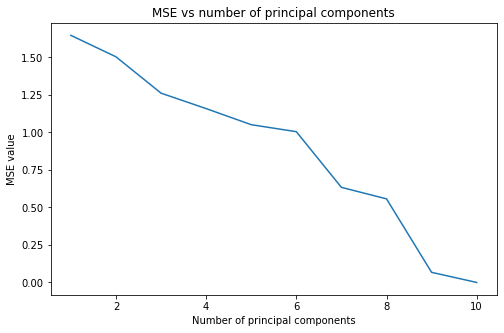

In [24]:
total_n_pc = d
mse_vals = []
for i in range(1, d + 1):
    U_p = U_mvg[:, :i]
    Y_val = get_encoding_Y(U_p, X_c_mvg)
    UY_plus_mean_val = np.dot(U_p, Y_val) + np.array([mean_X_mvg]).T
    mse_val = compute_MSE(X_mvg, UY_plus_mean_val)
    mse_vals.append(mse_val)

plt.figure(figsize=(8, 5))
plt.plot([i for i in range(1, d + 1)], mse_vals)
plt.xlabel("Number of principal components")
plt.ylabel("MSE value")
plt.title("MSE vs number of principal components")
plt.show()
    
